<a href="https://colab.research.google.com/github/yunl39/Project-/blob/main/Final_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


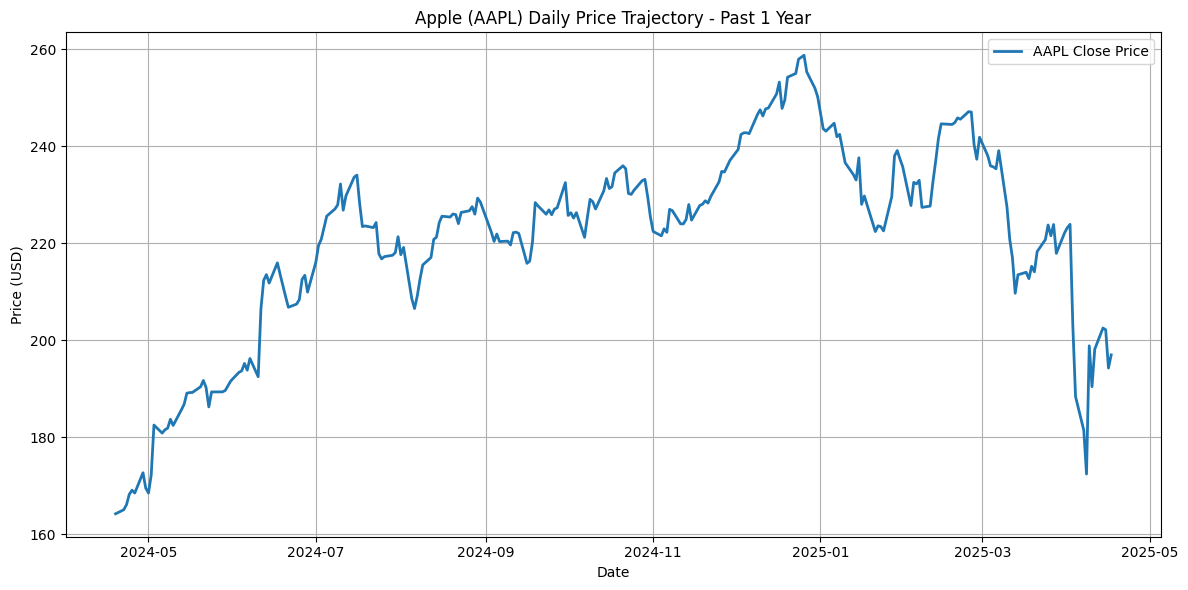

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download daily AAPL data for the past 1 year
aapl = yf.download('AAPL', interval='1d', period='1y')

# Keep only necessary columns (we'll use 'Close' for modeling)
aapl = aapl[['Close']].dropna()

# Compute daily log returns
aapl['log_return'] = np.log(aapl['Close'] / aapl['Close'].shift(1))
aapl.dropna(inplace=True)
import matplotlib.pyplot as plt

# Plot the Close price
plt.figure(figsize=(12, 6))
plt.plot(aapl.index, aapl['Close'], label='AAPL Close Price', linewidth=2)
plt.title('Apple (AAPL) Daily Price Trajectory - Past 1 Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
aapl.index = pd.to_datetime(aapl.index)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model = AutoReg(aapl['log_return'], lags=[2])
results = model.fit()
print(results.summary())


                            AutoReg Model Results                             
Dep. Variable:             log_return   No. Observations:                  250
Model:              Restr. AutoReg(2)   Log Likelihood                 615.835
Method:               Conditional MLE   S.D. of innovations              0.020
Date:                Fri, 18 Apr 2025   AIC                          -1225.671
Time:                        22:42:04   BIC                          -1215.131
Sample:                             2   HQIC                         -1221.428
                                  250                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.001      0.498      0.619      -0.002       0.003
log_return.L2     0.0939      0.064      1.473      0.141      -0.031       0.219
                                    Root

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
aic_values = []
bic_values = []
lags = range(1, 10)
for lag in lags:
    model = AutoReg(aapl['log_return'], lags=lag, old_names=False)
    result = model.fit()
    aic_values.append(result.aic)
    bic_values.append(result.bic)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


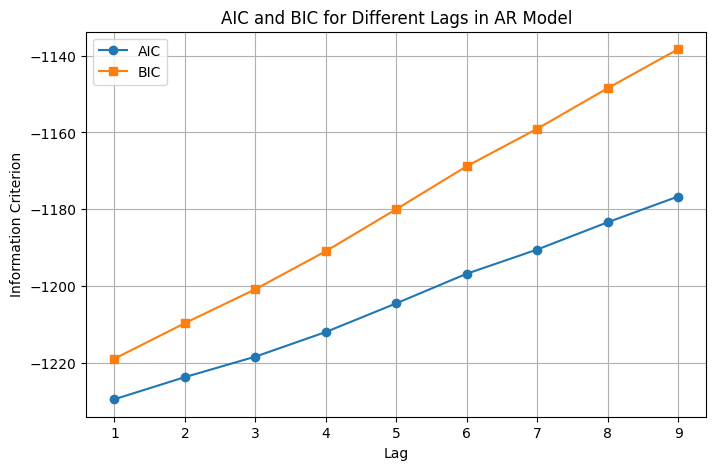

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(lags, aic_values, marker='o', label='AIC')
plt.plot(lags, bic_values, marker='s', label='BIC')
plt.title('AIC and BIC for Different Lags in AR Model')
plt.xlabel('Lag')
plt.ylabel('Information Criterion')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pd.read_csv("Sentiment.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Sentiment.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/ML Final project')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
senti = pd.read_csv("Sentiment.csv")

In [ ]:
senti.Date = pd.to_datetime(senti.Date)
senti = senti[senti['Date'] >= pd.to_datetime('2022-01-01')].set_index("Date")

<ipython-input-70-3c05962a14c7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  senti.Date = pd.to_datetime(senti.Date)


In [ ]:
senti.Bullish = senti.Bullish.str.extract('(\d+)').astype(float)/100
senti.Netural = senti.Netural.str.extract('(\d+)').astype(float)/100
senti.Bearish = senti.Bearish.str.extract('(\d+)').astype(float)/100

In [ ]:
senti.columns = ['Bullish', 'Neutral', 'Bearish']

In [ ]:
senti

,Bullish,Neutral,Bearish
Date,,,
2022-01-06,0.32,0.33,0.33
2022-01-13,0.24,0.36,0.38
2022-01-20,0.20,0.32,0.46
2022-01-27,0.23,0.23,0.52
2022-02-03,0.26,0.29,0.43
...,...,...,...
2025-03-20,0.21,0.20,0.58
2025-03-27,0.27,0.20,0.52
2025-04-03,0.21,0.16,0.61


In [ ]:

daily_senti = senti.resample('D').ffill()  # Or use .interpolate() for smooth fill

daily_senti = daily_senti



,Bullish,Neutral,Bearish
Date,,,
2022-01-06,0.32,0.33,0.33
2022-01-07,0.32,0.33,0.33
2022-01-08,0.32,0.33,0.33
2022-01-09,0.32,0.33,0.33
2022-01-10,0.32,0.33,0.33
2022-01-11,0.32,0.33,0.33
2022-01-12,0.32,0.33,0.33
2022-01-13,0.24,0.36,0.38
2022-01-14,0.24,0.36,0.38


In [ ]:
import yfinance as yf
import pandas as pd

# Define ticker symbols
tickers = ['AAPL', 'TSLA', 'AMZN', 'META', 'NVDA']

# Define date range
start_date = '2022-01-01'
end_date = '2025-04-15'

# Download data
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

data.to_csv('stock_data.csv')


[*********************100%***********************]  5 of 5 completed


In [ ]:
data.Date = pd.to_datetime
data = data.stack(level = 0).reset_index().rename(columns = {'level_1':'Ticker'})

<ipython-input-87-db3168837b04>:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.stack(level = 0).reset_index().rename(columns = {'level_1':'Ticker'})


In [ ]:
data.set_index("Date", inplace = True)

In [ ]:
df_merged = pd.merge(data, daily_senti, left_on = "Date", right_on = "Date", how = "left")

In [ ]:
df_merged.dropna(inplace = True)

In [ ]:
EPi = pd.read_csv("Expected Inflation.csv")
CPI = pd.read_csv("CPI.csv")
Fed_rate = pd.read_csv("federal fund rate.csv")
GDP = pd.read_csv("GDPC1.csv")
IPI = pd.read_csv("INdustrial production index.csv")

In [ ]:
EPi.columns = ['DATE', 'Epi']
CPI.columns = ['DATE', 'CPI']
Fed_rate.columns = ['DATE', 'FED_RATE']
GDP.columns = ['DATE', 'GDP']
IPI.columns = ['DATE', 'IPI']

In [ ]:
EPi.DATE = pd.to_datetime(EPi.DATE)
CPI.DATE = pd.to_datetime(CPI.DATE)
Fed_rate.DATE = pd.to_datetime(Fed_rate.DATE)
IPI.DATE = pd.to_datetime(IPI.DATE)
GDP.DATE = pd.to_datetime(GDP.DATE)

In [ ]:
macro_merged = pd.merge(EPi, CPI, on = "DATE", how = "outer")
macro_merged = pd.merge(macro_merged, Fed_rate, on = "DATE", how = "outer")
macro_merged = pd.merge(macro_merged, GDP, on = "DATE", how = "outer")
macro_merged = pd.merge(macro_merged, IPI, on = "DATE", how = "outer")

In [ ]:
macro_merged = macro_merged[macro_merged.DATE >= pd.to_datetime("2022-01-01")]
macro_merged.fillna(method = "ffill", inplace = True)
macro_merged.set_index("DATE", inplace = True)

<ipython-input-125-6a7ba369b5b6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  macro_merged.fillna(method = "ffill", inplace = True)


In [ ]:
df_full = pd.merge(df_merged, macro_merged, left_on = "Date", right_on = "DATE", how = "left")

In [ ]:
df_full

,Ticker,Open,High,Low,Close,Volume,Bullish,Neutral,Bearish,Epi,CPI,FED_RATE,GDP,IPI
0,AAPL,169.729997,172.285289,168.688228,169.042038,96904000,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146
1,AMZN,163.450500,164.800003,161.936996,163.253998,51958000,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146
2,META,321.305688,337.578998,321.206151,330.900452,27962800,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146
3,NVDA,27.591572,28.388174,27.017581,28.128630,454186000,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146
4,TSLA,359.000000,362.666656,340.166656,354.899994,90336600,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,AAPL,211.440002,212.940002,201.160004,202.520004,101352900,0.28,0.12,0.58,2.35,3.257815,4.33,23542.349,103.8892
4096,AMZN,186.839996,187.440002,179.229996,182.119995,48002500,0.28,0.12,0.58,2.35,3.257815,4.33,23542.349,103.8892
4097,META,556.169983,557.770020,528.280029,531.479980,14130900,0.28,0.12,0.58,2.35,3.257815,4.33,23542.349,103.8892
4098,NVDA,114.110001,114.290001,109.070000,110.709999,264705000,0.28,0.12,0.58,2.35,3.257815,4.33,23542.349,103.8892


In [ ]:
df_full.to_csv("Full_data.csv")

In [ ]:
macro_merged.to_csv("macro_merged.csv")

NameError: name 'macro_merged' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/ML Final project')
macro=pd.read_csv("macro_merged.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


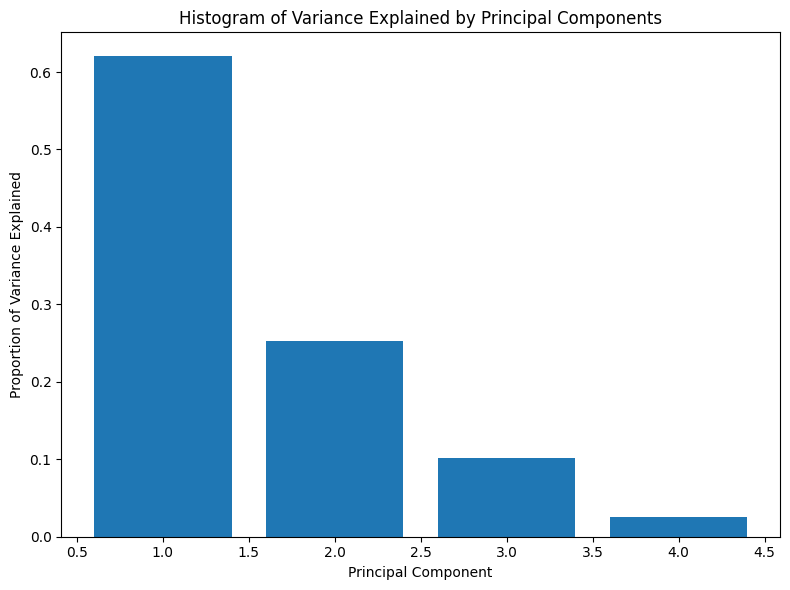

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features=macro.dropna().drop(columns=["DATE", "CPI"])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
macro_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title('Histogram of Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.tight_layout()
plt.show()


In [ ]:
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=features.columns
)

# Round values for nicer display
loadings_df = loadings_df.round(3)
display(loadings_df)
macro["macro_PC1"] = macro_pca[:, 0]
macro["macro_PC2"] = macro_pca[:, 1]

,PC1,PC2,PC3,PC4
Epi,-0.566,0.211,0.559,0.568
FED_RATE,0.611,-0.056,-0.147,0.776
GDP,0.542,0.088,0.790,-0.271
IPI,0.109,0.972,-0.202,-0.054


ValueError: Length of values (870) does not match length of index (871)

In [ ]:
macro = macro.dropna()

In [ ]:
macro["macro_PC1"] = macro_pca[:, 0]
macro["macro_PC2"] = macro_pca[:, 1]

<ipython-input-170-21604ac716c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro["macro_PC1"] = macro_pca[:, 0]
<ipython-input-170-21604ac716c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro["macro_PC2"] = macro_pca[:, 1]


In [ ]:
macro['DATE'] = pd.to_datetime(macro['DATE'])
merged = pd.merge(df_merged, macro, left_on='Date', right_on='DATE', how='left')

<ipython-input-173-7cf48dbda436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro['DATE'] = pd.to_datetime(macro['DATE'])


In [ ]:
merged.set_index("DATE", inplace = True)

,Ticker,Open,High,Low,Close,Volume,Bullish,Neutral,Bearish,Epi,CPI,FED_RATE,GDP,IPI,macro_PC1,macro_PC2
DATE,,,,,,,,,,,,,,,,
2022-01-06,AAPL,169.729997,172.285289,168.688228,169.042038,96904000,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146,-3.057162,-2.394465
2022-01-06,AMZN,163.450500,164.800003,161.936996,163.253998,51958000,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146,-3.057162,-2.394465
2022-01-06,META,321.305688,337.578998,321.206151,330.900452,27962800,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146,-3.057162,-2.394465
2022-01-06,NVDA,27.591572,28.388174,27.017581,28.128630,454186000,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146,-3.057162,-2.394465
2022-01-06,TSLA,359.000000,362.666656,340.166656,354.899994,90336600,0.32,0.33,0.33,2.77,3.966999,0.08,21903.850,101.2146,-3.057162,-2.394465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-14,AAPL,211.440002,212.940002,201.160004,202.520004,101352900,0.28,0.12,0.58,2.35,3.257815,4.33,23542.349,103.8892,1.195502,1.797091
2025-04-14,AMZN,186.839996,187.440002,179.229996,182.119995,48002500,0.28,0.12,0.58,2.35,3.257815,4.33,23542.349,103.8892,1.195502,1.797091
2025-04-14,META,556.169983,557.770020,528.280029,531.479980,14130900,0.28,0.12,0.58,2.35,3.257815,4.33,23542.349,103.8892,1.195502,1.797091


<ipython-input-186-c092d3fa3589>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple['log_return'] = np.log(Apple['Close']/Apple['Close'].shift(1))
<ipython-input-186-c092d3fa3589>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple["normalized_pc1"] = (Apple["macro_PC1"] - Apple["macro_PC1"].mean())/Apple["macro_PC1"].std()
<ipython-input-186-c092d3fa3589>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

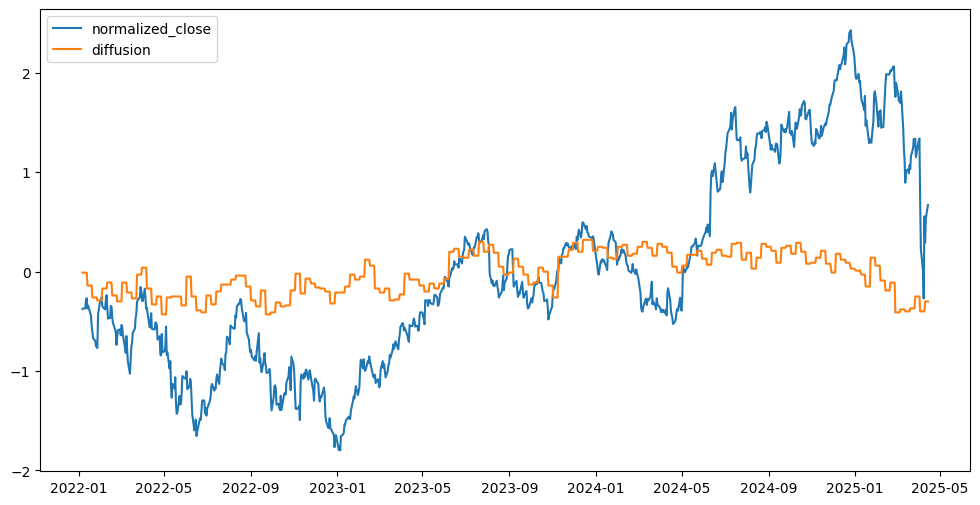

In [ ]:
import matplotlib.pyplot as plt
Apple=merged[merged.Ticker == "AAPL"]
Apple['log_return'] = np.log(Apple['Close']/Apple['Close'].shift(1))
Apple["normalized_pc1"] = (Apple["macro_PC1"] - Apple["macro_PC1"].mean())/Apple["macro_PC1"].std()
Apple["normalized_close"] = (Apple["Close"] - Apple["Close"].mean())/Apple["Close"].std()
Apple["normalized_pc2"] = (Apple["macro_PC2"] - Apple["macro_PC2"].mean())/Apple["macro_PC2"].std()
Apple["normalized_Epi"] = (Apple["Epi"] - Apple["Epi"].mean())/Apple["Epi"].std()
Apple["diffusion"] = Apple["Bullish"] - Apple["Bearish"]
plt.figure(figsize=(12, 6))
#plt.plot(Apple.index, Apple['normalized_pc1'], label='macro_PC1')
plt.plot(Apple.index, Apple['normalized_close'], label='normalized_close')
#plt.plot(Apple.index, Apple['normalized_Epi'], label='normalized_Epi')
plt.plot(Apple.index, Apple['diffusion'], label='diffusion')
plt.legend()
plt.show()

<ipython-input-192-30871888df93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected["normalized_close"] = (selected["Close"] - selected["Close"].mean())/selected["Close"].std()
<ipython-input-192-30871888df93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['7_day_avg'] = selected['normalized_close'].rolling(window=7).mean()
<ipython-input-192-30871888df93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

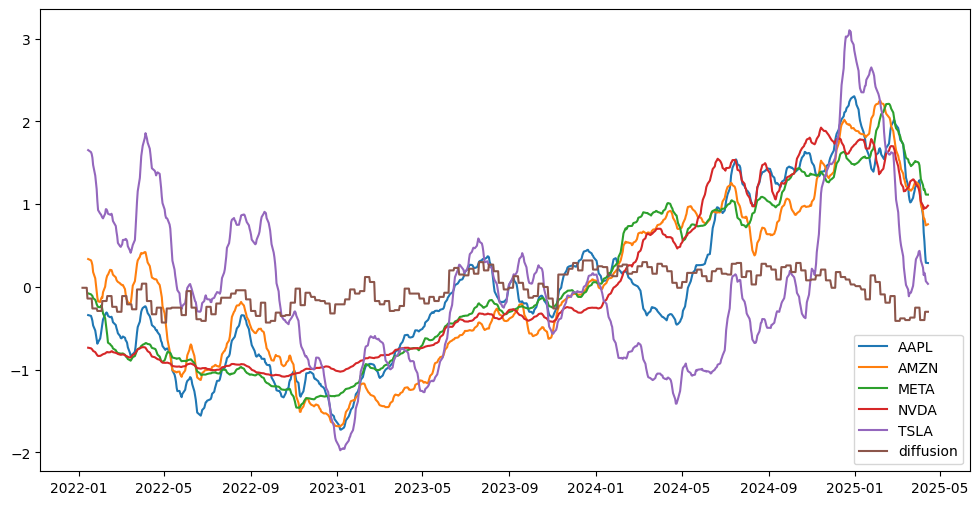

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for ticker in merged.Ticker.unique():
    selected=merged[merged.Ticker == ticker]
    selected["normalized_close"] = (selected["Close"] - selected["Close"].mean())/selected["Close"].std()
    selected['7_day_avg'] = selected['normalized_close'].rolling(window=7).mean()
    plt.plot(selected.index, selected['7_day_avg'], label=ticker)


merged["diffusion"] = merged["Bullish"] - merged["Bearish"]
plt.plot(Apple.index, Apple['diffusion'], label='diffusion')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sum = []
n=1
for ticker in merged.Ticker.unique():
    n+=1
    selected=merged[merged.Ticker == ticker]
    selected["normalized_close"] = (selected["Close"] - selected["Close"].mean())/selected["Close"].std()
    selected['7_day_avg'] = selected['normalized_close'].rolling(window=7).mean()
    sum+=selected['7_day_avg'].tolist()/n
    plt.plot(selected.index, selected['7_day_avg'], label=ticker)


merged["diffusion"] = merged["Bullish"] - merged["Bearish"]
plt.ploy(Apple.index,sum, label='mean moving')
plt.plot(Apple.index, Apple['diffusion'], label='diffusion')
plt.legend()
plt.show()

<ipython-input-195-a34bc2994238>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected["normalized_close"] = (selected["Close"] - selected["Close"].mean())/selected["Close"].std()
<ipython-input-195-a34bc2994238>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['7_day_avg'] = selected['normalized_close'].rolling(window=7).mean()


TypeError: unsupported operand type(s) for /: 'list' and 'int'

<Figure size 1200x600 with 0 Axes>

<ipython-input-200-b41ac4eaee31>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple["diffusion"] = Apple["Bullish"] - Apple["Bearish"]


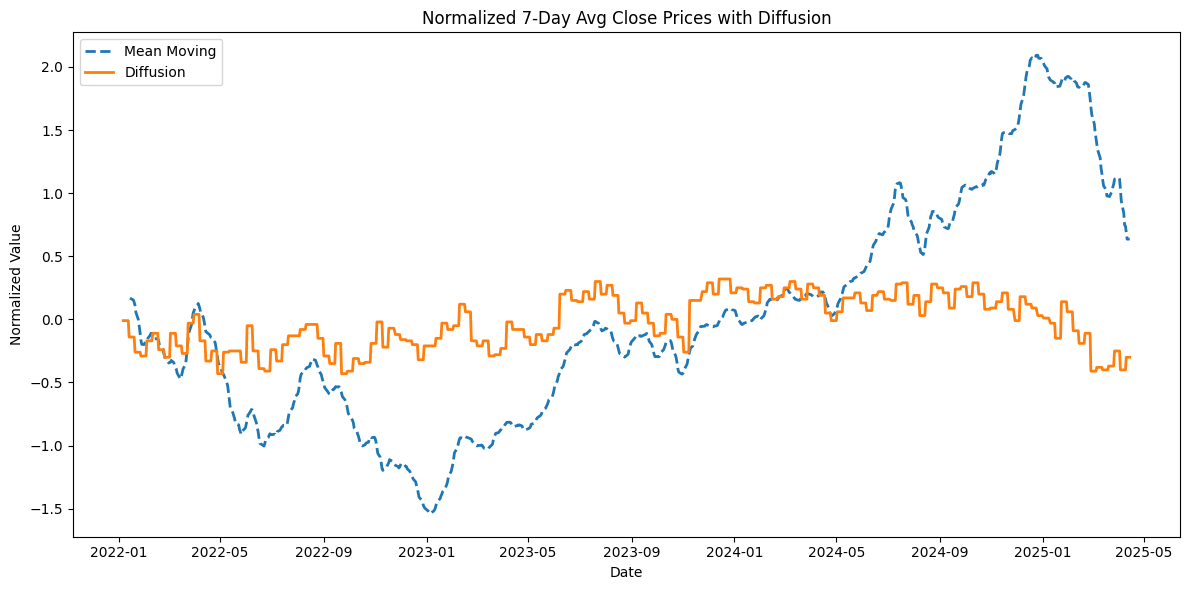

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(12, 6))
sum_series = None
ticker_count = 0

for ticker in merged.Ticker.unique():
    selected = merged[merged.Ticker == ticker].copy()
    selected["normalized_close"] = (selected["Close"] - selected["Close"].mean()) / selected["Close"].std()
    selected["7_day_avg"] = selected["normalized_close"].rolling(window=7).mean()

    # Accumulate the rolling averages
    if sum_series is None:
        sum_series = selected["7_day_avg"]
    else:
        sum_series = sum_series.add(selected["7_day_avg"], fill_value=0)

    ticker_count += 1

# Calculate the mean of the moving averages
mean_moving = sum_series / ticker_count

# Plot the mean moving average and diffusion for Apple
Apple = merged[merged.Ticker == "AAPL"]
Apple["diffusion"] = Apple["Bullish"] - Apple["Bearish"]

plt.plot(Apple.index, mean_moving.loc[Apple.index], label='Mean Moving', linewidth=2, linestyle='--')
plt.plot(Apple.index, Apple["diffusion"], label='Diffusion', linewidth=2)
plt.legend()
plt.title("Normalized 7-Day Avg Close Prices with Diffusion")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.tight_layout()
plt.show()
